In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#opening housing data file
prototype = open('C:/Users/truly/Personal Projects/LinearRegression1/archive/housing.csv')

In [3]:
#set the data using pandas
data = pd.read_csv(prototype)

In [4]:
#displaying the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#let's drop any potential NaN values
data.dropna(inplace = True)

In [6]:
#checking to see this worked
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#now let's use sci-kit learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [8]:
# our independent variables are going to be every variable that ISN'T the value of the house
# subsequently the value of the house will be the dependent variable
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
#checking to see that this worked
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
# Splitting the data into training and testing portions, test size is 20% of the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [12]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

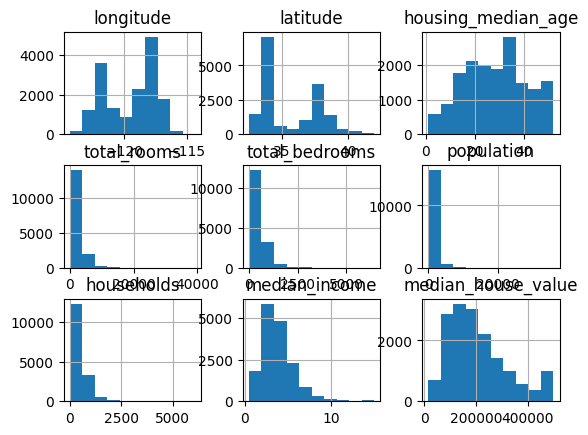

In [13]:
 #histogram of independent features
train_data.hist()

<Axes: >

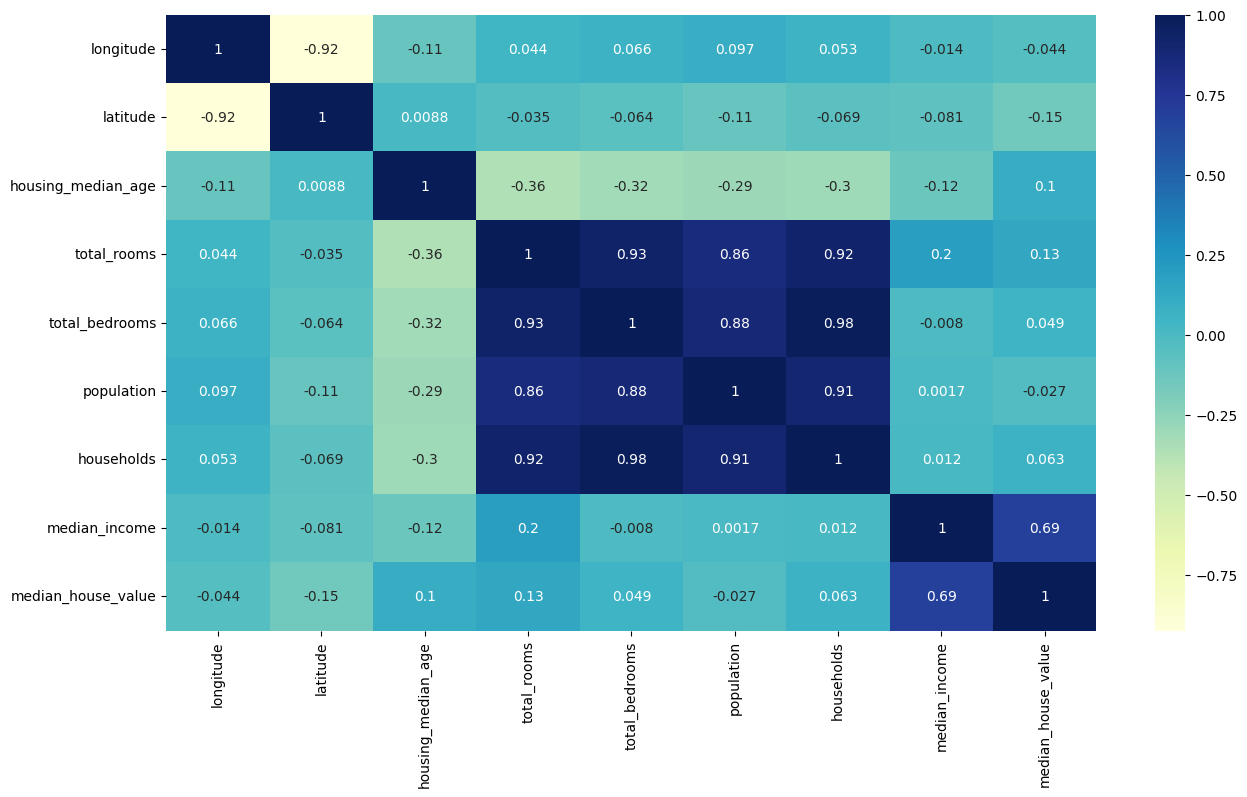

In [14]:
# heatmap to show correlation between features. higher value = higher correlation, -1 <= X <= 1
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")


In [15]:
#fixing the skew of the data by taking the log of the features
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

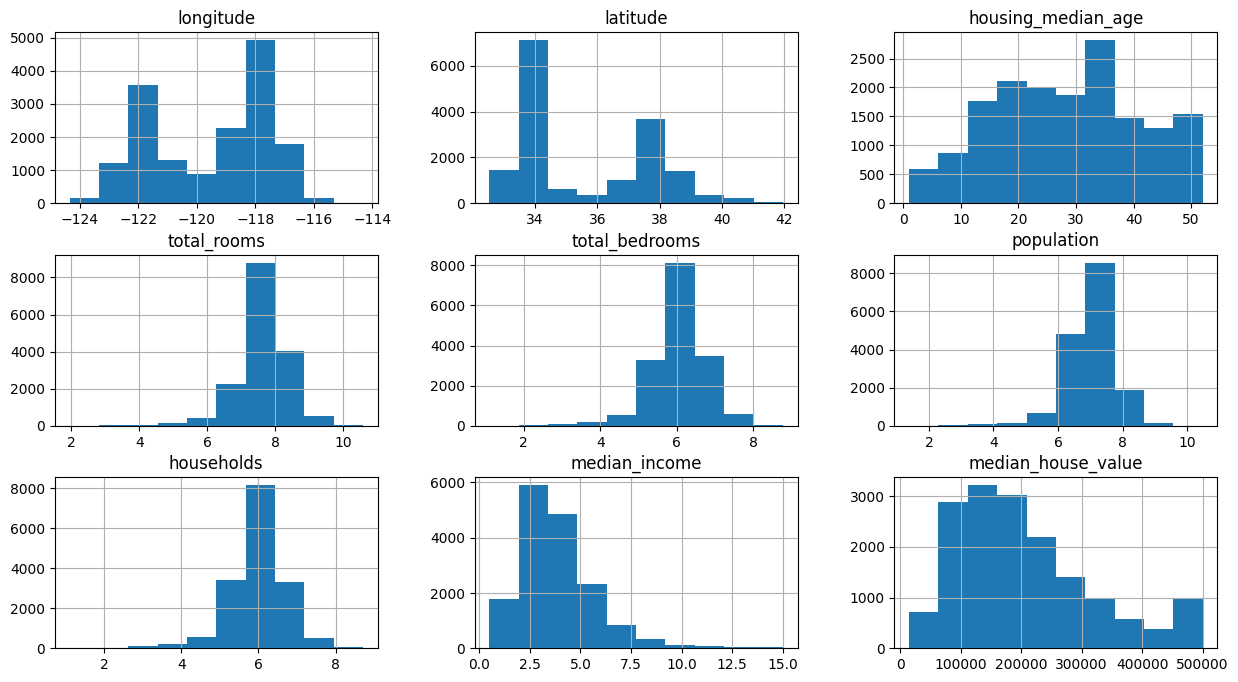

In [16]:
train_data.hist(figsize=(15, 8))

In [17]:
# We need to evaluate the ocean_proximity feature because it's definitely relevant to the cost of the household
# However, we can't use it as a string
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

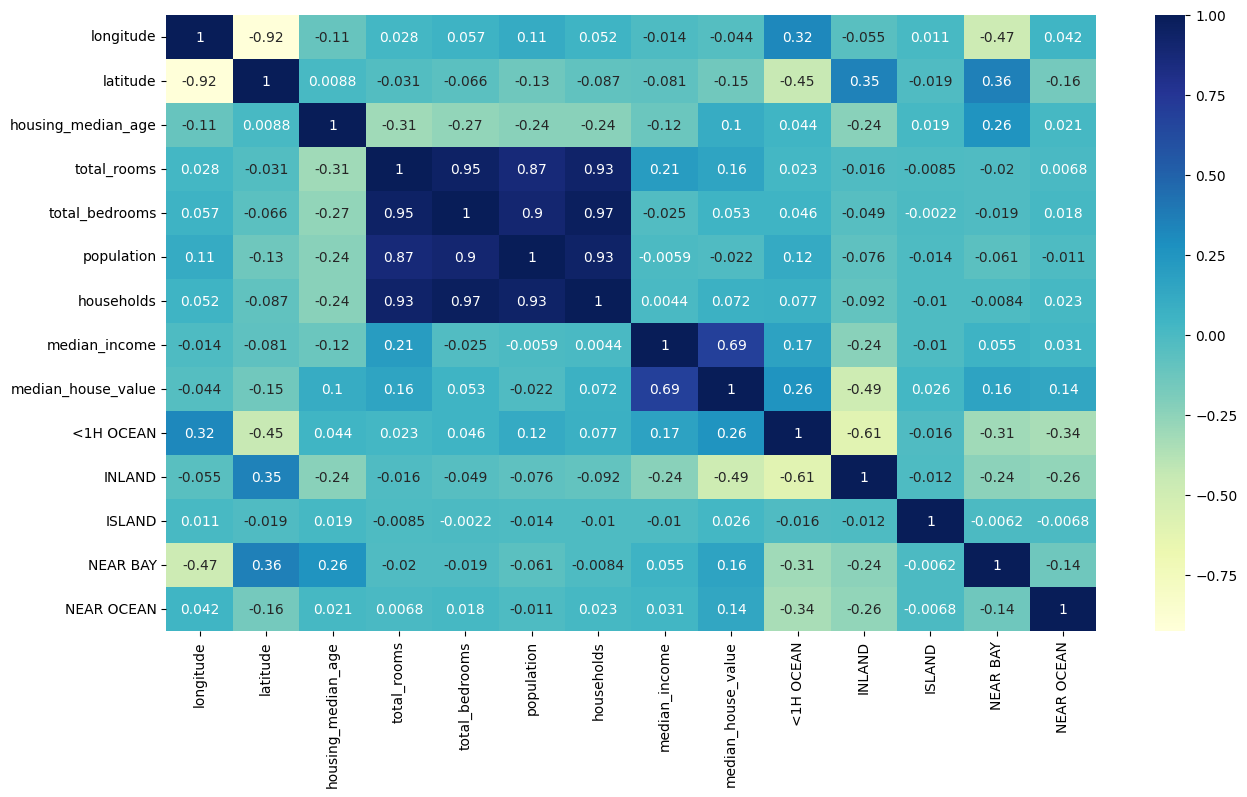

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.loc[:, train_data.columns!='ocean_proximity'].corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

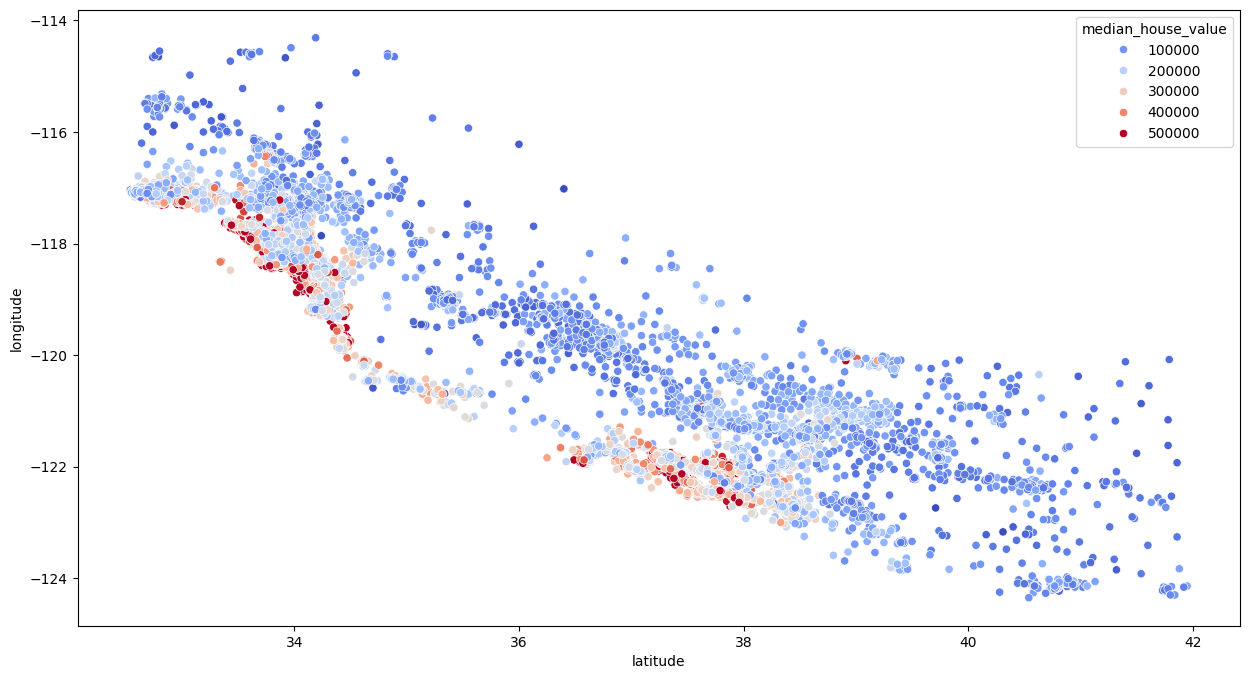

In [19]:
#scatterplot of median house values by coordinates
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [20]:
# With all of the data prepared, we can use sci-kit learn's Linear Regression model to train the dataset
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
# Now we prepare the test data
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [22]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
7190,-118.17,34.05,45.0,6.598509,5.187386,6.573680,5.111988,2.5962,124100.0,True,False,False,False
12973,-121.31,38.67,26.0,7.235619,5.424950,6.694562,5.501258,4.1563,135700.0,False,True,False,False
9971,-122.47,38.50,23.0,7.692570,6.030685,6.866933,5.891644,4.1993,214500.0,False,True,False,False
4956,-118.31,34.01,52.0,7.843064,6.165418,7.257003,6.098074,1.8214,123200.0,True,False,False,False
1863,-123.91,41.68,22.0,7.539559,5.888878,6.612041,5.752573,2.9688,152700.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-122.29,37.89,52.0,7.360104,5.857933,6.542472,5.789960,3.1375,229100.0,False,False,True,False
16187,-121.30,37.96,24.0,7.100852,5.905362,7.092574,5.840642,1.7875,76800.0,False,True,False,False
19205,-122.71,38.44,27.0,6.874198,5.529429,6.137727,5.442418,1.7000,350000.0,True,False,False,False
19394,-120.83,37.77,20.0,7.448916,6.001415,6.968850,5.996452,1.6759,116700.0,False,True,False,False


In [26]:
# Now, let's predict the price of a custom house

reg.predict([[-117, 32, 50, 6, 9, 4, 6, 3, True, False, False, False, False]])

C:\Users\truly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([852889.5739449])